In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
all_gb_df = pd.read_csv('../../data/derived/plays/all_gb_df.csv').drop(columns=['Unnamed: 0'])
# Combine ground balls to first base and infield ground balls
inf_gb_df = pd.concat([
    pd.read_csv('../../data/derived/plays/inf_gb_with_throw_1b_df.csv').drop('Unnamed: 0', axis=1),
    pd.read_csv('../../data/derived/plays/first_base_gb_df.csv').drop('Unnamed: 0', axis=1)
    ])

player_pos_df = pd.read_csv('../../data/combined/player_pos.csv').drop(['Unnamed: 0'], axis=1)

# Get timestamp of contact and timestamp of inf acquire
inf_acquire_df = inf_gb_df[['game_str', 'play_id', 'timestamp', 'player_position']]
contact_df = all_gb_df[['game_str', 'play_id', 'timestamp']]
df = contact_df.merge(inf_acquire_df, on=['game_str', 'play_id'], 
                      how='inner', suffixes=('_contact', '_acquire'))

# Get player's position at time of contact
df = df.merge(player_pos_df, left_on=['game_str', 'play_id', 'timestamp_contact', 'player_position'], 
              right_on=['game_str', 'play_id', 'timestamp', 'player_position'], how='inner')
df.drop(columns='timestamp', inplace=True)

# Get player's position at time of inf acquire
df = df.merge(player_pos_df, left_on=['game_str', 'play_id', 'timestamp_acquire', 'player_position'], 
              right_on=['game_str', 'play_id', 'timestamp', 'player_position'], 
              how='inner', suffixes=('_contact', '_acquire'))
df.drop(columns='timestamp', inplace=True)

# Add column for ball direction
df['ball_direction'] = np.where(df['field_x_contact'] > df['field_x_acquire'], 'left', 'right')
df = df[['game_str', 'play_id', 'ball_direction']]

df['ball_direction'].value_counts()

right    532
left     502
Name: ball_direction, dtype: int64

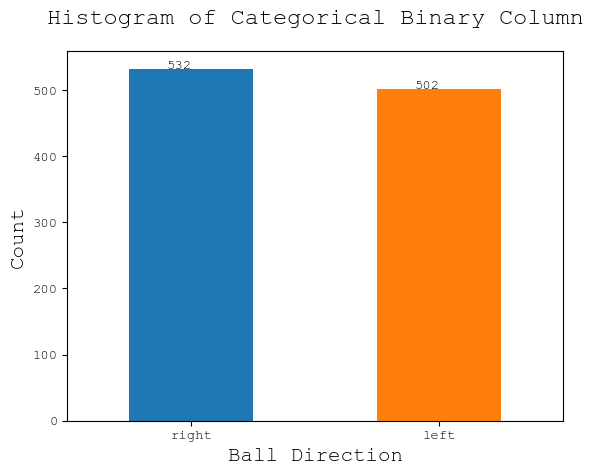

In [41]:
# Plot histogram of left_flag in df which is acategory
# variable with 2 categories: 0 and 1
left_flag_counts = df['ball_direction'].value_counts()

font = {
    'family': 'courier new'
}
plt.rc('font', **font)

title_font = {
    'family': 'courier new',
    'size': 17,
}

label_font = {
    'family': 'courier new',
    'size': 15,
}

# Create a bar plot to visualize the distribution
left_flag_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.xticks(ticks=[0, 1], labels=['right', 'left'], rotation=0)
plt.xlabel('Ball Direction', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.text(x=-0.1, y=left_flag_counts[0]+1, s=left_flag_counts[0])
plt.text(x=0.9, y=left_flag_counts[1]+1, s=left_flag_counts[1])
plt.title('Histogram of Categorical Binary Column', fontdict=title_font, pad=20)
plt.xticks(rotation=0)
plt.show()


In [42]:
df.to_csv('../../data/derived/plays/ball_directions.csv')